# Neural Network Regression  
In this notebook the goal is to levarge the power of neural networks and get lowest MRRMSE(Mean Rowwise Root Mean Sqared Error)

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read data 

In [2]:
de_train =   pd.read_parquet("/kaggle/input/open-problems-single-cell-perturbations/de_train.parquet")
id_map = pd.read_csv("/kaggle/input/open-problems-single-cell-perturbations/id_map.csv")
sample_submission = pd.read_csv("/kaggle/input/open-problems-single-cell-perturbations/sample_submission.csv")

# Become one with data

In [3]:
de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


In [4]:
id_map.head()

,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867


In [5]:
de_train.isnull().sum()

cell_type      0
sm_name        0
sm_lincs_id    0
SMILES         0
control        0
              ..
ZXDB           0
ZXDC           0
ZYG11B         0
ZYX            0
ZZEF1          0
Length: 18216, dtype: int64

In [6]:
unique= de_train['sm_name'].unique()
unique, print(f"Count {len(unique)}")

Count 146


(array(['Clotrimazole', 'Mometasone Furoate', 'Idelalisib', 'Vandetanib',
        'Bosutinib', 'Ceritinib', 'Lamivudine', 'Crizotinib',
        'Cabozantinib', 'Flutamide', 'Dasatinib', 'Selumetinib',
        'Trametinib', 'ABT-199 (GDC-0199)', 'Oxybenzone', 'Vorinostat',
        'Raloxifene', 'Linagliptin', 'Lapatinib', 'Canertinib',
        'Disulfiram', 'Vardenafil', 'Palbociclib', 'Ricolinostat',
        'Dabrafenib', 'Proscillaridin A;Proscillaridin-A', 'IN1451',
        'Ixabepilone', 'CEP-18770 (Delanzomib)', 'RG7112', 'MK-5108',
        'Resminostat', 'IMD-0354', 'Alvocidib', 'LY2090314',
        'Methotrexate', 'LDN 193189', 'Tacalcitol', 'Colchicine', 'R428',
        'TL_HRAS26', 'BMS-387032', 'CGP 60474', 'TIE2 Kinase Inhibitor',
        'PD-0325901', 'Isoniazid', 'GSK-1070916', 'Masitinib',
        'Saracatinib', 'CC-401', 'Decitabine', 'Ketoconazole',
        'HYDROXYUREA', 'BAY 61-3606', 'Navitoclax', 'Porcn Inhibitor III',
        'GW843682X', 'Prednisolone', 'Tamatinib'

In [7]:
de_train['cell_type'].unique()

array(['NK cells', 'T cells CD4+', 'T cells CD8+', 'T regulatory cells',
       'B cells', 'Myeloid cells'], dtype=object)

In [8]:
de_train[de_train["control"] == True].count  

<bound method DataFrame.count of               cell_type     sm_name sm_lincs_id  \
104             B cells  Dabrafenib    LSM-6303   
105       Myeloid cells  Dabrafenib    LSM-6303   
106            NK cells  Dabrafenib    LSM-6303   
107        T cells CD4+  Dabrafenib    LSM-6303   
108        T cells CD8+  Dabrafenib    LSM-6303   
109  T regulatory cells  Dabrafenib    LSM-6303   
275             B cells  Belinostat   LSM-43181   
276       Myeloid cells  Belinostat   LSM-43181   
277            NK cells  Belinostat   LSM-43181   
278        T cells CD4+  Belinostat   LSM-43181   
279        T cells CD8+  Belinostat   LSM-43181   
280  T regulatory cells  Belinostat   LSM-43181   

                                                SMILES  control       A1BG  \
104  CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...     True   0.942197   
105  CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...     True   0.254567   
106  CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...     True  -0.1

Visualizing more and staring at data for sometime will be more helpful for understanding but let's try building some simple model.

# Preprocess data 
We'll take only 'cell_type' and 'sm_name' as features and 18211 gene values as labels.

In [9]:
# shuffle the data
de_train = de_train.sample(frac=1.0, random_state=42)

In [10]:
de_train

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
350,T regulatory cells,TPCA-1,LSM-1136,NC(=O)Nc1sc(-c2ccc(F)cc2)cc1C(N)=O,False,2.175274,1.219289,2.396227,2.885988,3.384956,...,-1.062199,1.178715,0.180416,0.755145,1.809688,1.644712,0.701406,0.137341,0.230949,0.179458
377,NK cells,Dovitinib,LSM-1127,CN1CCN(c2ccc3[nH]c(-c4c(N)c5c(F)cccc5[nH]c4=O)...,False,0.214531,-0.115171,0.326515,0.032289,0.220971,...,0.438939,0.216506,-0.108654,-0.063070,0.006721,-0.593161,-0.044022,0.475729,0.356555,-0.038020
163,T regulatory cells,Tacalcitol,LSM-45518,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@H](C)CC[C@...,False,0.391257,-0.052922,0.540292,0.718991,1.083183,...,-1.755527,0.556352,0.089976,-0.000729,0.419802,1.020842,0.367313,0.486345,-0.856723,0.191009
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
132,T cells CD8+,MK-5108,LSM-36812,O=C(O)[C@]1(Cc2cccc(Nc3nccs3)n2)CC[C@@H](Oc2cc...,False,0.094873,1.067610,-0.745980,1.083842,0.638504,...,0.279780,0.489431,0.147217,0.292313,0.029266,0.330628,1.038142,-0.194884,1.078132,0.057001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,T regulatory cells,Raloxifene,LSM-3425,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,False,1.080779,0.226991,2.440729,2.581894,1.773980,...,-0.276043,0.768273,1.351487,2.359651,1.470219,0.866639,0.467307,0.663700,-0.122574,-0.315800
106,NK cells,Dabrafenib,LSM-6303,CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...,True,-0.161665,0.269009,-1.770091,-0.198444,0.954753,...,0.131425,-1.112697,-0.589313,-0.660929,0.016530,0.319136,0.299521,-0.383452,0.267828,-1.100267
270,T regulatory cells,RN-486,LSM-47132,CN1CCN(c2ccc(Nc3cc(-c4cccc(-n5ccc6cc(C7CC7)cc(...,False,-0.304126,0.443651,0.688265,-0.101457,-0.005912,...,-0.855096,-0.499096,-0.211083,-0.495621,-0.233734,1.120530,-0.109096,0.128084,0.313468,-0.512444
435,NK cells,Doxorubicin,LSM-4062,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,False,0.482294,-1.262924,-0.545405,-0.497739,-0.750201,...,0.444958,0.029279,0.337660,0.025025,0.035943,0.691171,0.352091,0.046012,-0.760812,-0.168719


In [11]:
# Create features and and labels for reverse model 18211 features and 152 labels for true model
features_columns = ["cell_type", "sm_name"]
labels_columns=["cell_type","sm_name","sm_lincs_id","SMILES","control"]
labels = de_train.drop(columns=labels_columns)
features = pd.DataFrame(de_train, columns=features_columns)

In [12]:
features

,cell_type,sm_name
350,T regulatory cells,TPCA-1
377,NK cells,Dovitinib
163,T regulatory cells,Tacalcitol
609,T regulatory cells,Atorvastatin
132,T cells CD8+,MK-5108
...,...,...
71,T regulatory cells,Raloxifene
106,NK cells,Dabrafenib
270,T regulatory cells,RN-486
435,NK cells,Doxorubicin


In [13]:
labels

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
350,2.175274,1.219289,2.396227,2.885988,3.384956,3.267348,0.134622,1.829941,-0.956191,-0.404039,...,-1.062199,1.178715,0.180416,0.755145,1.809688,1.644712,0.701406,0.137341,0.230949,0.179458
377,0.214531,-0.115171,0.326515,0.032289,0.220971,-0.463554,1.016849,0.153039,0.292684,0.038020,...,0.438939,0.216506,-0.108654,-0.063070,0.006721,-0.593161,-0.044022,0.475729,0.356555,-0.038020
163,0.391257,-0.052922,0.540292,0.718991,1.083183,1.021599,-0.097250,0.306833,-3.331719,0.235092,...,-1.755527,0.556352,0.089976,-0.000729,0.419802,1.020842,0.367313,0.486345,-0.856723,0.191009
609,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,-0.544709,0.282458,-0.431359,-0.364961,0.043123,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
132,0.094873,1.067610,-0.745980,1.083842,0.638504,0.307649,-0.038108,0.772186,-0.736735,-0.462323,...,0.279780,0.489431,0.147217,0.292313,0.029266,0.330628,1.038142,-0.194884,1.078132,0.057001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.080779,0.226991,2.440729,2.581894,1.773980,1.989227,-0.074095,0.906555,2.214564,-0.182784,...,-0.276043,0.768273,1.351487,2.359651,1.470219,0.866639,0.467307,0.663700,-0.122574,-0.315800
106,-0.161665,0.269009,-1.770091,-0.198444,0.954753,1.155912,-0.312552,0.621897,-0.154055,0.331780,...,0.131425,-1.112697,-0.589313,-0.660929,0.016530,0.319136,0.299521,-0.383452,0.267828,-1.100267
270,-0.304126,0.443651,0.688265,-0.101457,-0.005912,-0.004914,-0.247434,0.281614,-0.915735,-0.032908,...,-0.855096,-0.499096,-0.211083,-0.495621,-0.233734,1.120530,-0.109096,0.128084,0.313468,-0.512444
435,0.482294,-1.262924,-0.545405,-0.497739,-0.750201,0.959704,0.527966,1.198200,-0.482740,0.635863,...,0.444958,0.029279,0.337660,0.025025,0.035943,0.691171,0.352091,0.046012,-0.760812,-0.168719


In [14]:
# Get test data 
test_data = pd.DataFrame(id_map, columns=features_columns)

# Process categorical data
We'll use OneHotEncode for categorical data

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the encoder
encoder = OneHotEncoder()

# Fit the encoder on features
encoder.fit(features)

# Transform the features into one-hot encoded format
one_hot_encode_features = encoder.transform(features)

# Transform the test data(id_map)
one_hot_test = encoder.transform(test_data)

In [16]:
# check shape
one_hot_encode_features.toarray().shape, one_hot_test.toarray().shape

((614, 152), (255, 152))

In [17]:
# check one sample
one_hot_encode_features.toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Split Data into training, validation and test sets 

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training, 15% validation, and 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(one_hot_encode_features, labels.values, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [19]:
# Printing the shapes of the data splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (429, 152)
X_val shape: (92, 152)
X_test shape: (93, 152)
y_train shape: (429, 18211)
y_val shape: (92, 18211)
y_test shape: (93, 18211)


In [20]:
# We also get full features for final training 
full_features = one_hot_encode_features.toarray()
full_labels = labels.values

In [21]:
print("full_features shape:", full_features.shape)
print("full_labels shape:", full_labels.shape)

full_features shape: (614, 152)
full_labels shape: (614, 18211)


# Auxillary functions 

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

def create_model_checkpoint(filepath, monitor='val_mae', save_best_only=True,
                            save_weights_only=True, mode='auto', verbose=0):
    """
    Create a ModelCheckpoint callback for saving the best model weights during training.

    Args:
        filepath (str): Filepath to save the best weights.
        monitor (str): Metric to monitor (e.g., 'val_loss' or 'val_mae').
        save_best_only (bool): Save only the best weights.
        save_weights_only (bool): Save only the model's weights, not the entire model.
        mode (str): One of {'auto', 'min', 'max'}. In 'min' mode, it saves when the monitored metric decreases.
        verbose (int): Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

    Returns:

        keras.callbacks.ModelCheckpoint: ModelCheckpoint callback.
    """
    checkpoint = ModelCheckpoint(
        filepath=filepath,
        monitor=monitor,
        save_best_only=save_best_only,
        save_weights_only=save_weights_only,
        mode=mode,
        verbose=verbose
    )
    return checkpoint

In [23]:
def plot_training_history(history, metrics):
    """
    Plot training history curves for loss and evaluation metrics on the same line.

    Args:
        history (keras.callbacks.History): Training history object.
        metrics (list): List of metric names to plot.

    Returns:
        None
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(12, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss', color="blue")
    plt.plot(epochs, val_loss, label='Validation Loss', color="red")
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot specified evaluation metrics on the same line
    for metric in metrics:
        train_metric_name = f'Training {metric.capitalize()}'
        val_metric_name = f'Validation {metric.capitalize()}'
        train_metric = history.history[metric]
        val_metric = history.history['val_' + metric]

        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_metric, label=train_metric_name, color="green")
        plt.plot(epochs, val_metric, label=val_metric_name, color="orange")

    plt.title('Metrics')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error

def calculate_mae_and_mrrmse(model, data, y_true):
    """
    Calculate Mean Absolute Error (MAE) and Mean Rowwise Root Mean Squared Error (MRRMSE).

    Parameters:
    - model: The trained  model.
    - data: The input data for prediction.
    - y_true: The true target values.
    - scaler: The scaler used for data normalization.

    Returns:
    - None
    """
    # Predict using the model
    y_pred_original = model.predict(data, batch_size=1)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true , y_pred_original)
    
    # Calculate Mean Rowwise Root Mean Squared Error (MRRMSE)
    rowwise_rmse = np.sqrt(np.mean(np.square(y_true - y_pred_original), axis=1))
    mrrmse_score = np.mean(rowwise_rmse)
    
    # Print the results
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Rowwise Root Mean Squared Error (MRRMSE): {mrrmse_score}")

In [25]:
def mean_rowwise_rmse_loss(y_true, y_pred):
    """
    Custom loss function to calculate the Mean Rowwise Root Mean Squared Error (RMSE) loss.

    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE loss as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse

In [26]:
def custom_mean_rowwise_rmse(y_true, y_pred):
    """
    Custom metric to calculate the Mean Rowwise Root Mean Squared Error (RMSE).

    Parameters:
    - y_true: The true target values.
    - y_pred: The predicted values.

    Returns:
    - Mean Rowwise RMSE as a scalar tensor.
    """
    # Calculate RMSE for each row
    rmse_per_row = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred), axis=1))
    # Calculate the mean of RMSE values across all rows
    mean_rmse = tf.reduce_mean(rmse_per_row)
    
    return mean_rmse

Beautiful functions let's start experiment with building models

# Build the model

In [27]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential

> **Model_0:** Let's start with only 2 dense layers 

In [28]:
tf.random.set_seed(42)

model_0 = Sequential([
    Dense(512, activation="tanh"),
    Dense(18211, activation="linear")
])

model_0.compile(loss=mean_rowwise_rmse_loss, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[custom_mean_rowwise_rmse])

history_0 = model_0.fit(X_train, y_train,
                       epochs=10,
                       validation_data=(X_val,y_val),
                       batch_size=32,
                       callbacks=[create_model_checkpoint("model_0", monitor="val_custom_mean_rowwise_rmse")])

Epoch 1/10
14/14 [==============================] - 6s 126ms/step - loss: 1.3330 - custom_mean_rowwise_rmse: 1.3218 - val_loss: 1.1626 - val_custom_mean_rowwise_rmse: 1.1626
Epoch 2/10
14/14 [==============================] - 1s 51ms/step - loss: 1.3164 - custom_mean_rowwise_rmse: 1.3046 - val_loss: 1.1432 - val_custom_mean_rowwise_rmse: 1.1431
Epoch 3/10
14/14 [==============================] - 1s 79ms/step - loss: 1.3030 - custom_mean_rowwise_rmse: 1.3318 - val_loss: 1.1309 - val_custom_mean_rowwise_rmse: 1.1307
Epoch 4/10
14/14 [==============================] - 1s 36ms/step - loss: 1.2912 - custom_mean_rowwise_rmse: 1.2724 - val_loss: 1.1249 - val_custom_mean_rowwise_rmse: 1.1247
Epoch 5/10
14/14 [==============================] - 1s 37ms/step - loss: 1.2809 - custom_mean_rowwise_rmse: 1.3242 - val_loss: 1.1185 - val_custom_mean_rowwise_rmse: 1.1183
Epoch 6/10
14/14 [==============================] - 1s 40ms/step - loss: 1.2687 - custom_mean_rowwise_rmse: 1.2600 - val_loss: 1.1108 

In [29]:
# Loading weights 
model_0.load_weights("model_0")
calculate_mae_and_mrrmse(model=model_0, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.720931328886185
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0688578319835276


In [30]:
# Model performance on full data 
calculate_mae_and_mrrmse(model=model_0, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.7750002944065837
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.170277337609647


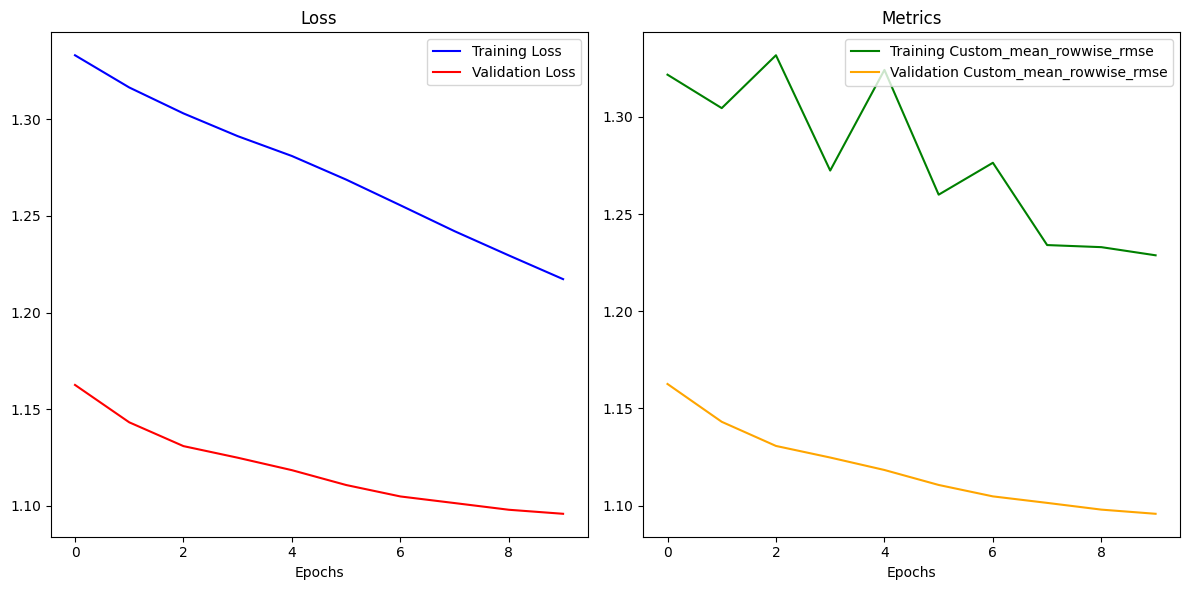

In [31]:
# Visualize the learning from our helper functions
plot_training_history(history_0, metrics=["custom_mean_rowwise_rmse"])

Okay, it seems the model is not learning much and is underfitting. Let's try something different. 

> **model_1:** Increase layers and neurons 

In [32]:
tf.random.set_seed(42)

model_1 = Sequential([
    Dense(1024, activation="tanh"),
    Dense(512, activation="tanh"),
    Dense(18211, activation="linear")
])

model_1.compile(loss=mean_rowwise_rmse_loss, 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[custom_mean_rowwise_rmse])

history_1 = model_1.fit(X_train, y_train,
                       epochs=30,
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_1", monitor="val_custom_mean_rowwise_rmse")])

Epoch 1/30
14/14 [==============================] - 3s 101ms/step - loss: 1.3309 - custom_mean_rowwise_rmse: 1.3198 - val_loss: 1.1430 - val_custom_mean_rowwise_rmse: 1.1429
Epoch 2/30
14/14 [==============================] - 1s 52ms/step - loss: 1.3057 - custom_mean_rowwise_rmse: 1.2933 - val_loss: 1.1281 - val_custom_mean_rowwise_rmse: 1.1280
Epoch 3/30
14/14 [==============================] - 1s 71ms/step - loss: 1.2818 - custom_mean_rowwise_rmse: 1.3084 - val_loss: 1.1125 - val_custom_mean_rowwise_rmse: 1.1125
Epoch 4/30
14/14 [==============================] - 1s 41ms/step - loss: 1.2525 - custom_mean_rowwise_rmse: 1.2345 - val_loss: 1.1113 - val_custom_mean_rowwise_rmse: 1.1112
Epoch 5/30
14/14 [==============================] - 1s 42ms/step - loss: 1.2342 - custom_mean_rowwise_rmse: 1.2701 - val_loss: 1.1072 - val_custom_mean_rowwise_rmse: 1.1074
Epoch 6/30
14/14 [==============================] - 0s 7ms/step - loss: 1.2140 - custom_mean_rowwise_rmse: 1.2089 - val_loss: 1.1098 -

In [33]:
# Loading weights 
model_1.load_weights("model_1")
calculate_mae_and_mrrmse(model=model_1, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.7313500840181072
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0648863813552483


In [34]:
# Model performance on full data 
calculate_mae_and_mrrmse(model=model_1, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.7589716167336273
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.1061356357586047


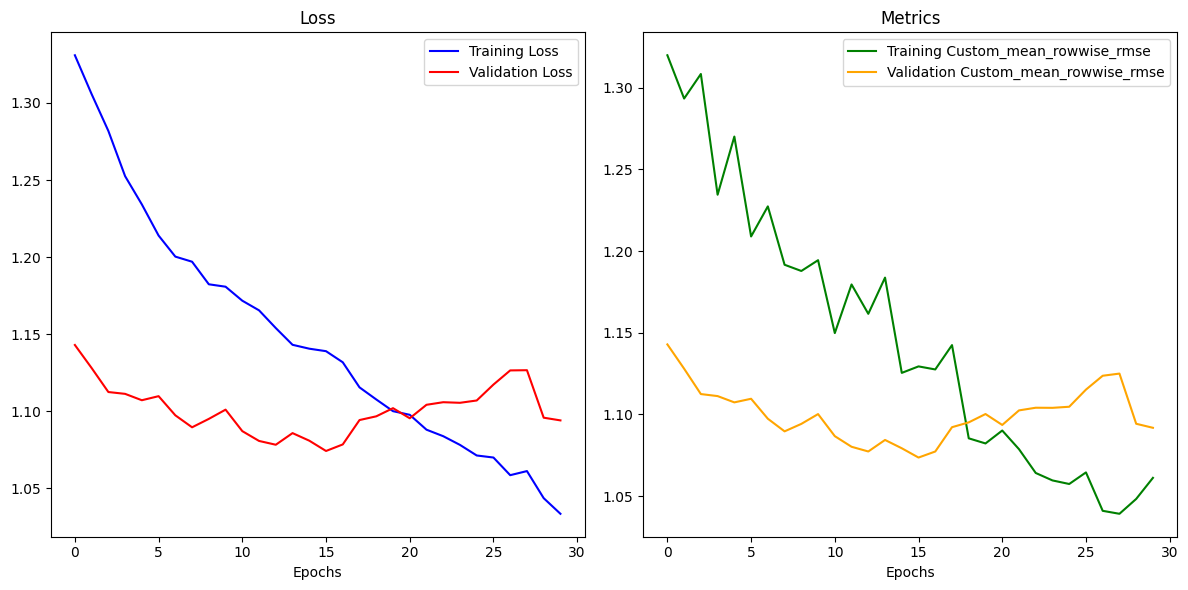

In [35]:
# Visualize the learning from our helper functions
plot_training_history(history_1, metrics=["custom_mean_rowwise_rmse"])

> The model is not performing good let's increase complexity and also add Dropout and BatchNormalization layers

In [36]:
tf.random.set_seed(42)

model_2 = Sequential([ 
    Dense(256),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(18211,activation= "linear")
])


model_2.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_2 = model_2.fit(X_train, y_train,
                       epochs=30,
                       verbose=0, #train in silent mode
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_2", monitor="val_mae")])

In [37]:
model_2.load_weights("model_2")
calculate_mae_and_mrrmse(model=model_2, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 0.7255524269549204
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.1034799520958851


In [38]:
calculate_mae_and_mrrmse(model=model_2, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.6989181783996697
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0940312249618325


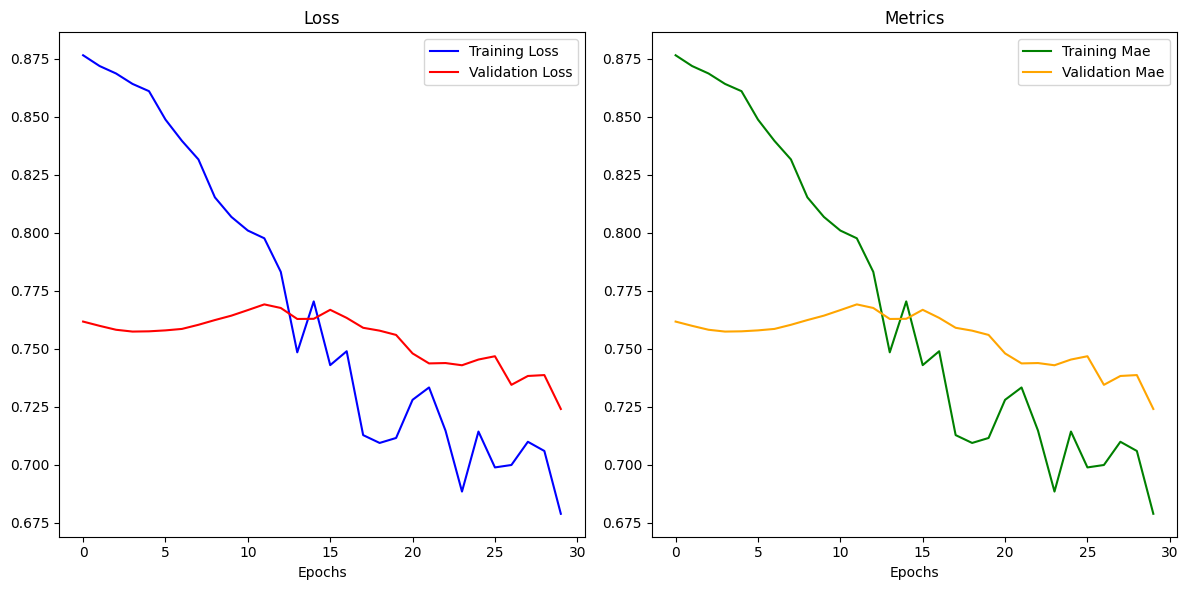

In [39]:
#  Visualize the learning from our helper functions
plot_training_history(history_2, metrics=["mae"])

> Changing metrics and using same model

In [40]:
tf.random.set_seed(42)

# clone model 2
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0027),
                metrics=[custom_mean_rowwise_rmse])

history_3 = model_3.fit(X_train, y_train,
                       epochs=25,
                       verbose=100, #train in silent mode
                       validation_data=(X_val,y_val),
                       callbacks=[create_model_checkpoint("model_3", monitor="val_custom_mean_rowwise_rmse")])

Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25
Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25
Epoch 25/25


In [41]:
model_3.load_weights("model_3")
calculate_mae_and_mrrmse(model=model_3, data=X_test, y_true=y_test)

93/93 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.7162889407766464
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0909026588034343


In [42]:
calculate_mae_and_mrrmse(model=model_3, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.6846960510111111
Mean Rowwise Root Mean Squared Error (MRRMSE): 1.0742882373645193


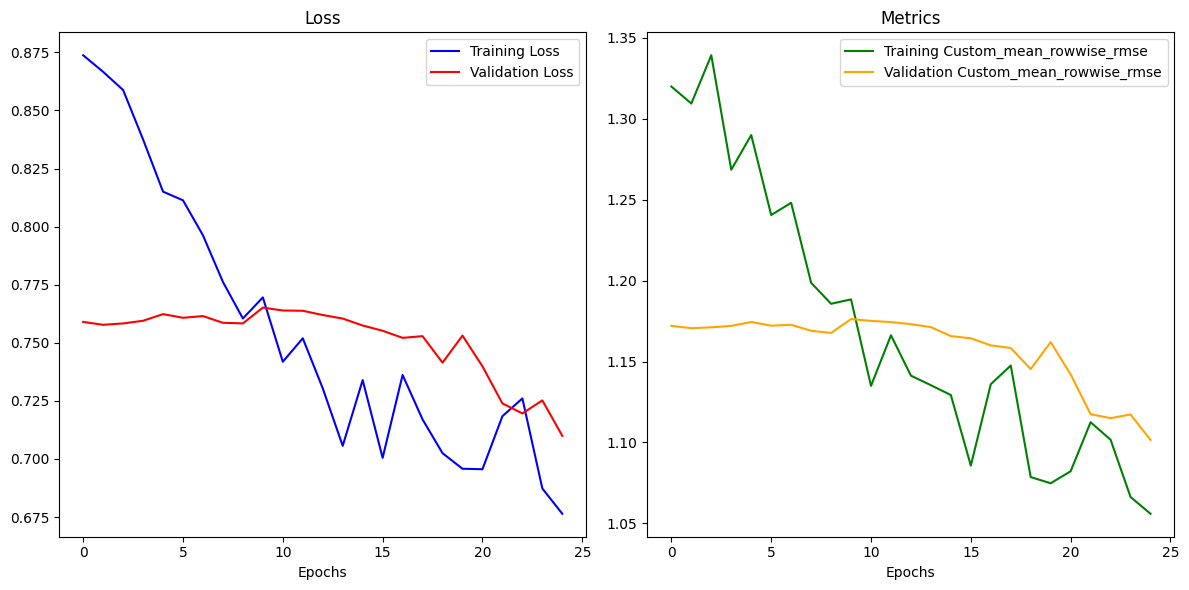

In [43]:
plot_training_history(history_3, metrics=["custom_mean_rowwise_rmse"])

# K-fold validation 

In [44]:
tf.random.set_seed(42)

# clone model 2
model_4 = Sequential([ 
    Dense(256),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.1),
    Dense(18211,activation= "linear")
])

model_4.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[custom_mean_rowwise_rmse])

In [45]:
from sklearn.model_selection import KFold

# Define the number of folds (K)
num_folds = 10 # You can change this value as needed

# Initialize lists to store the model's performance scores
mae_scores = []
mrrmse_scores = []

# Initialize the KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=51)

# Loop through the K folds
for train_index, val_index in kf.split(full_features):
    # Convert indices to integers and split the data
    train_index = train_index.astype(int)
    val_index = val_index.astype(int)
    X_train_, X_val_ = full_features[train_index], full_features[val_index]
    y_train_, y_val_ = full_labels[train_index], full_labels[val_index]

    # Train your model on X_train and y_train
    model_4.fit(X_train_, y_train_, epochs=50, verbose=0)

    # Make predictions on the validation set
    y_preds = model_4.predict(X_val_)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val_, y_preds)
    mae_scores.append(mae)

    # Calculate the Mean Rowwise Root Mean Square Error (MRRMSE)
    rowwise_rmse = np.sqrt(np.mean(np.square(y_val_ - y_preds), axis=1))
    mrrmse_score = np.mean(rowwise_rmse)
    mrrmse_scores.append(mrrmse_score)

# Calculate the mean and standard deviation of MAE and MRRMSE scores
mean_mae = np.mean(mae_scores)
mean_mrrmse = np.mean(mrrmse_scores)

# Print the results
print(f'Average MAE across {num_folds} folds: {mean_mae:.4f} ')
print(f'Average MRRMSE across {num_folds} folds: {mean_mrrmse:.4f}')

2/2 [==============================] - 0s 4ms/step
Average MAE across 10 folds: 0.6891 
Average MRRMSE across 10 folds: 1.1082


Train the model on full data

In [46]:
model_4.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[custom_mean_rowwise_rmse])

history_4 = model_4.fit(full_features, full_labels,
                       epochs=50,
                       verbose=0)

In [47]:
calculate_mae_and_mrrmse(model=model_4, data=full_features, y_true=full_labels)

614/614 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 0.564304402767055
Mean Rowwise Root Mean Squared Error (MRRMSE): 0.9384356287054081


# Predicting on test data 

In [48]:
preds = model_4.predict(one_hot_test.toarray(), batch_size=1)

255/255 [==============================] - 0s 2ms/step


In [49]:
preds.shape 

(255, 18211)

In [50]:
sample_columns = sample_submission.columns
sample_columns= sample_columns[1:]
submission_df = pd.DataFrame(preds, columns=sample_columns)

In [51]:
submission_df.insert(0, 'id', range(255))

In [52]:
sample_submission

,id,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
submission_df

,id,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0,0.058656,0.084829,0.041478,-0.006555,0.071967,0.298666,-0.006910,0.176319,-0.060327,...,-0.009104,0.014548,0.019719,0.023061,0.082669,0.108950,0.110113,0.071378,-0.081469,-0.029372
1,1,0.077248,0.096428,0.044974,0.007320,0.073675,0.264973,0.006825,0.176221,-0.070217,...,0.029059,0.012872,-0.018850,0.050113,0.073978,0.143714,0.123214,0.081424,-0.081989,-0.045388
2,2,0.201182,0.180457,-0.085319,-0.075884,0.330882,0.784457,0.039530,0.308344,-0.087607,...,0.112614,-0.006560,-0.001862,0.069730,0.135106,0.208680,0.154809,0.119230,-0.173375,-0.033169
3,3,0.095326,0.125605,0.060981,0.001051,0.096801,0.310376,0.023895,0.188974,-0.070244,...,0.037214,0.027863,-0.005479,0.076149,0.086393,0.161618,0.132884,0.091859,-0.079984,-0.045854
4,4,0.054463,0.075396,0.030824,0.009202,0.091088,0.267065,-0.011238,0.174185,-0.066075,...,0.007198,-0.002556,-0.004181,0.022756,0.066136,0.108525,0.110468,0.070625,-0.089982,-0.033117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,250,-0.053572,-0.060716,-0.111814,-0.000067,-0.060807,-0.208394,-0.047730,0.001310,-0.072682,...,0.033506,-0.090983,-0.206710,-0.099534,-0.065150,-0.009158,0.044430,0.028925,-0.045724,-0.088080
251,251,0.180742,0.131148,-0.049504,0.044116,0.557140,0.667222,0.015402,0.208871,-0.085477,...,0.051449,-0.018536,-0.039308,0.022471,0.198561,0.184332,0.128112,0.080426,-0.159273,-0.047116
252,252,0.407168,0.285824,-0.043890,0.512023,1.859536,0.858017,0.096568,-0.013393,-0.196093,...,-0.090866,-0.099104,-0.195944,-0.210490,0.453260,0.237137,0.105150,0.093705,-0.124522,-0.119134
253,253,0.986609,0.501370,-0.193621,0.743153,4.440107,2.930522,0.143669,0.265520,-0.128725,...,0.032751,-0.024638,-0.110254,0.069544,1.324293,0.489029,0.200308,0.042242,-0.420101,-0.033723


In [54]:
submission_df.to_csv("submission.csv", index=False)

In [55]:
!zip submission_preds.zip /kaggle/working/submission.csv

  adding: kaggle/working/submission.csv (deflated 58%)


V1
